In [1]:
# Network definition
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)


Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [2]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 5, 5])


In [6]:
import torchvision
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

dataset = torchvision.datasets.MNIST(
    root = 'data',
    download=True,
    train=True,
    transform=torchvision.transforms.Compose(
        [torchvision.transforms.Resize(32), torchvision.transforms.ToTensor()]
    ),
)



tensor([0.0000, 0.0000, 0.1216, 0.6314, 0.9490, 0.6588, 0.1020, 0.0157, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0902, 0.4392, 0.9686, 0.9490, 0.2314, 0.0353, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])
Label: 9


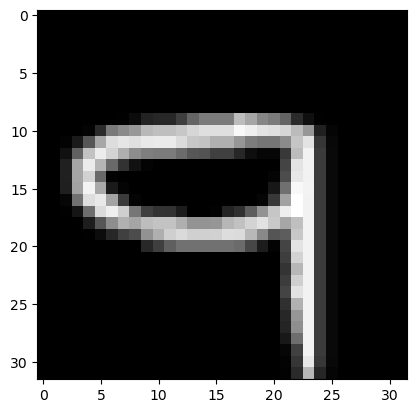

In [56]:

train_dataloader = DataLoader(dataset, batch_size=64, shuffle=True)
train_features, train_labels = next(iter(train_dataloader))

print(train_features[0].squeeze()[15,:])
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
print(f"Label: {label}")
plt.show()

In [57]:
r_input = torch.randn(1, 1, 32, 32)
r_img = r_input.squeeze()
plt.imshow(r_img, cmap='gray')

out = net(r_input)
print(out)

SyntaxError: invalid syntax (<ipython-input-57-b2e753094fda>, line 2)